# Data Exploration

In this notebook we will explore diverse datasets that we found useful and coherent to our project. 
We will explore, visualize and analyze data coming from 3 sources : 
- https://regulus.unige.ch/spokencallsharedtask/ 
- https://openslr.org/101/
- https://commonvoice.mozilla.org/en/datasets
- https://psi.engr.tamu.edu/l2-arctic-corpus/


## Mozilla Common Voice

## L2 Arctic : https://psi.engr.tamu.edu/l2-arctic-corpus/

### Loading the data 

In [13]:
import os
import zipfile

# Path
data_path = "/Users/nourbencherif/Desktop/SemantikMatch/data/l2arctic_release_v5.0"  

# Unzip the files
for file in os.listdir(data_path):
    if file.endswith(".zip"):
        with zipfile.ZipFile(os.path.join(data_path, file), 'r') as zip_ref:
            zip_ref.extractall(os.path.join(data_path, file.replace(".zip", "")))

print("All ZIP files have been extracted.")

All ZIP files have been extracted.


We will focus on one folder to better understand the structure of the data before generalizing to the rest.

### ABA Folder

In [21]:
speaker_path = os.path.join(data_path, "ABA") + '/ABA'  # Replace with any speaker folder

# List subfolders
subfolders = os.listdir(speaker_path)
print(f"Subfolders for ABA: {subfolders}")

# Inspect contents of each subfolder
for subfolder in subfolders:
    folder_path = os.path.join(speaker_path, subfolder)
    print(f"Contents of {subfolder}: {os.listdir(folder_path)[:5]}")  # Show first 5 files

Subfolders for ABA: ['wav', 'textgrid', 'transcript', 'annotation']
Contents of wav: ['arctic_b0126.wav', 'arctic_b0132.wav', 'arctic_a0026.wav', 'arctic_a0032.wav', 'arctic_b0324.wav']
Contents of textgrid: ['arctic_a0442.TextGrid', 'arctic_b0127.TextGrid', 'arctic_b0341.TextGrid', 'arctic_a0443.TextGrid', 'arctic_b0340.TextGrid']
Contents of transcript: ['arctic_b0119.txt', 'arctic_b0131.txt', 'arctic_b0125.txt', 'arctic_a0019.txt', 'arctic_a0031.txt']
Contents of annotation: ['arctic_b0340.TextGrid', 'arctic_b0126.TextGrid', 'arctic_a0116.TextGrid', 'arctic_a0117.TextGrid', 'arctic_b0083.TextGrid']


In [19]:
!pip install librosa --quiet


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [22]:
import librosa
import IPython.display as ipd

# Path to audio folder
wav_folder = os.path.join(speaker_path, "wav")
audio_file = os.path.join(wav_folder, os.listdir(wav_folder)[0])  # First audio file

# Load and play
y, sr = librosa.load(audio_file, sr=None)
print(f"Sample Rate: {sr}, Duration: {librosa.get_duration(y=y, sr=sr):.2f} seconds")
ipd.Audio(audio_file)

Sample Rate: 44100, Duration: 5.44 seconds


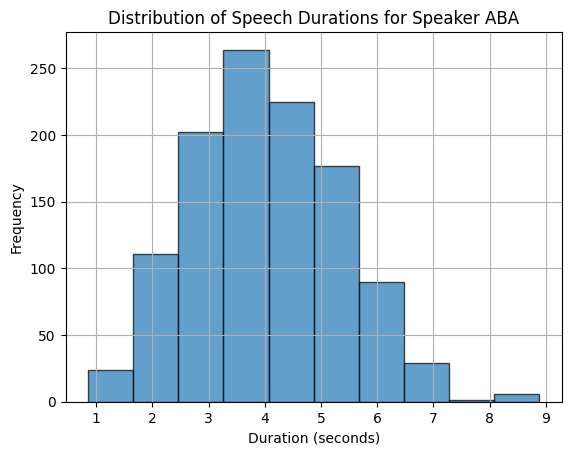

In [23]:
durations = []
for file in os.listdir(wav_folder):
    y, sr = librosa.load(os.path.join(wav_folder, file), sr=None)
    durations.append(librosa.get_duration(y=y, sr=sr))

# Plot distribution
import matplotlib.pyplot as plt

plt.hist(durations, bins=10, alpha=0.7, edgecolor="black")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Speech Durations for Speaker ABA")
plt.grid(True)
plt.show()

In [26]:
# Transcript folder:

# Path to transcript folder
transcript_folder = os.path.join(speaker_path, "transcript")
transcript_file = os.path.join(transcript_folder, os.listdir(transcript_folder)[0])  

# Read transcript
with open(transcript_file, "r") as f:
    lines = f.readlines()

print(f"First 5 lines of transcript:\n{lines[:5]}")

First 5 lines of transcript:
['Billinger may arrive in time']


All the audios are short, as seen in the plot above. The transcripts are likely to be only 1 line each.
TO CHECK :  is it enough to train the model knowing that it will have to handle longer audios.

In [28]:
# Annotation folder :
annotation_folder = os.path.join(speaker_path, "annotation")
annotation_file = os.path.join(annotation_folder, os.listdir(annotation_folder)[0])

In [29]:
!pip install praatio --quiet


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [33]:
from praatio import tgio

textgrid_folder = os.path.join(speaker_path, "textgrid")
textgrid_file = os.path.join(textgrid_folder, os.listdir(textgrid_folder)[0])

# Load TextGrid
tg = tgio.openTextgrid(textgrid_file)
print(tg.tierNameList)  # List of tiers (e.g., phonemes, words)

# Extract intervals from the "words" tier
word_intervals = tg.tierDict["words"].entryList

# Display the first 5 intervals
for interval in word_intervals[:5]:
    print(f"Start: {interval.start}, End: {interval.end}, Text: {interval.label}")

['words', 'phones']
Start: 0.03, End: 0.29, Text: you
Start: 0.29, End: 0.67, Text: live
Start: 0.97, End: 1.23, Text: on
Start: 1.23, End: 1.45, Text: an
Start: 1.45, End: 2.09, Text: income


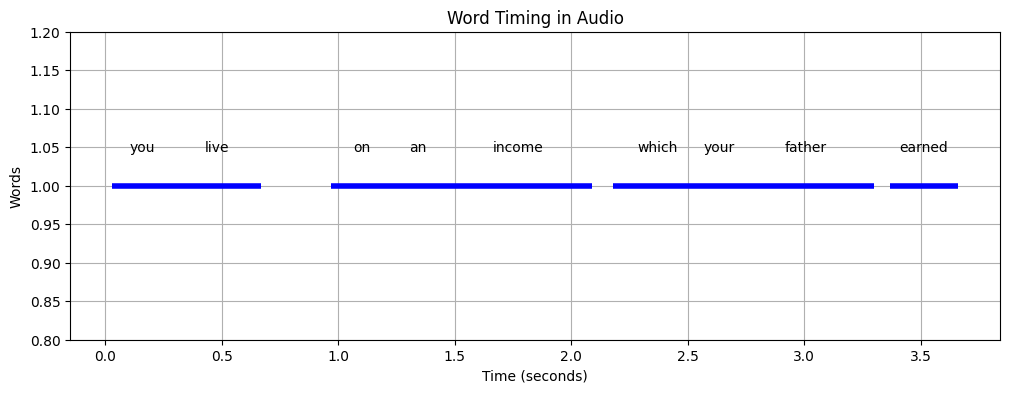

In [34]:
import matplotlib.pyplot as plt

# Extract timing data
starts = [interval.start for interval in word_intervals]
ends = [interval.end for interval in word_intervals]
labels = [interval.label for interval in word_intervals]

# Plot
plt.figure(figsize=(12, 4))
for i, (start, end, label) in enumerate(zip(starts, ends, labels)):
    plt.hlines(1, start, end, colors="blue", lw=4, label=label if i == 0 else "")
    plt.text((start + end) / 2, 1.05, label, ha="center", va="center", fontsize=10)

plt.xlabel("Time (seconds)")
plt.ylabel("Words")
plt.title("Word Timing in Audio")
plt.ylim(0.8, 1.2)
plt.grid(True)
plt.show()

### Data Overview

In [38]:


# number of speakers
speakers = [s for s in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, s))]
print(f"Number of Speakers: {len(speakers)}")

# Count total audio files and summarize durations
total_files = 0
durations = []
for speaker in speakers:
    wav_folder = os.path.join(data_path, speaker, speaker, "wav")
    files = [f for f in os.listdir(wav_folder) if f.endswith(".wav")]
    total_files += len(files)
    for file in files:
        y, sr = librosa.load(os.path.join(wav_folder, file), sr=None)
        durations.append(librosa.get_duration(y=y, sr=sr))

print(f"Total Audio Files: {total_files}")
print(f"Average Duration: {sum(durations) / len(durations):.2f} seconds")

Number of Speakers: 25
Total Audio Files: 26889
Average Duration: 3.68 seconds


The audios are short

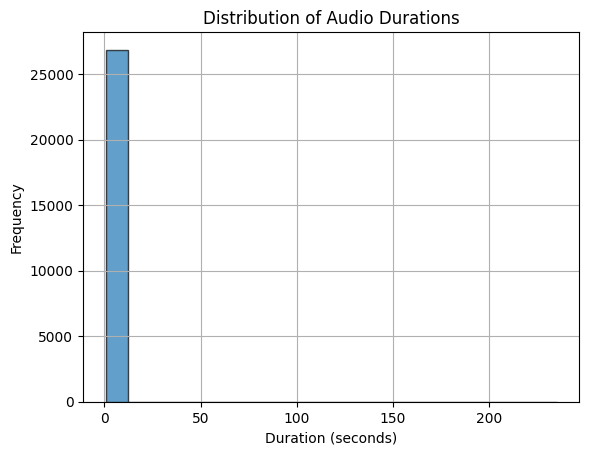

In [39]:
import matplotlib.pyplot as plt

plt.hist(durations, bins=20, alpha=0.7, edgecolor="black")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Audio Durations")
plt.grid(True)
plt.show()

In [40]:
speech_rates = []

for speaker in speakers:
    textgrid_folder = os.path.join(data_path, speaker, speaker, "textgrid")
    wav_folder = os.path.join(data_path, speaker, speaker, "wav")
    for file in os.listdir(textgrid_folder):
        if not file.endswith(".TextGrid"):
            continue
        tg = tgio.openTextgrid(os.path.join(textgrid_folder, file))
        word_intervals = tg.tierDict["words"].entryList
        num_words = len([w for w in word_intervals if w.label.strip()])
        audio_duration = tg.maxTimestamp
        speech_rates.append(num_words / audio_duration)

# Plot histogram of speech rates
plt.hist(speech_rates, bins=20, alpha=0.7, edgecolor="black")
plt.xlabel("Speech Rate (words/second)")
plt.ylabel("Frequency")
plt.title("Distribution of Speech Rates")
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/nourbencherif/Desktop/SemantikMatch/data/l2arctic_release_v5.0/suitcase_corpus/suitcase_corpus/textgrid'